### 1. Start the Environment

In [1]:
import numpy as np
from collections import defaultdict
import random
# !pip3 install git+https://github.com/slremy/netsapi --user --upgrade
from netsapi.challenge import * 

In [2]:
env = ChallengeSeqDecEnvironment(experimentCount = 1050000)

### 2. Examine the State and Action Spaces

In [3]:
num_agents=1
states = env.state
states = np.array([states]).reshape(1, 1)
state_size = states.shape[1]
action_size = 2

In [4]:
print('Size of each action:', action_size)
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states)

Size of each action: 2
There are 1 agents. Each observes a state with length: 1
The state for the first agent looks like: [[1]]


### 3. Take Random Actions in the Environment

In [5]:
env.reset()     # reset the environment    
states = np.array([env.state]).reshape(1, 1) # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, 0, 1)                  # all actions between -1 and 1
    print(actions.shape)
 
    next_states, reward, done, _ = env.evaluateAction(actions[0])           # send all actions to tne environment
    scores += reward                        # update the score (for each agent)
    print("reward=",reward)
    states = next_states                              # roll over states to next time step
    if np.any(done): 
        print(done)
        # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

(1, 2)
1050000  Evaluations Remaining
reward= 2.5183539074210244
(1, 2)
1049999  Evaluations Remaining
reward= 10.237901956475731
(1, 2)
1049998  Evaluations Remaining
reward= 57.73631140132107
(1, 2)
1049997  Evaluations Remaining
reward= 106.91226729023971
(1, 2)
1049996  Evaluations Remaining
reward= -0.1564864635595451
True
Total score (averaged over agents) this episode: 177.248348091898


In [6]:
actions = np.random.randn(1, 2)

### 4. Take Actions with DDPG

In [7]:
import torch
from collections import deque
from ddpg_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def ddpg(n_episodes=500, max_t=1000,target_score=600):
    """ Deep Deterministic Policy Gradients
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_window = deque(maxlen=5)
    scores = np.zeros(num_agents)
    scores_episode = []
    agent = Agent(state_size, action_size, random_seed=0)
    epsilon=0.6

    for i_episode in range(1, n_episodes+1):
        
        agent.reset()
        env.reset() 
        scores = np.zeros(num_agents) 
        next_states = np.array([env.state]).reshape(1, 1) 
        for t in range(max_t):
            states = next_states
            actions = np.array(agent.act(states),dtype="float64")
            if epsilon > random.random() :
                actions = np.random.randn(num_agents, action_size)    
            actions = np.clip(actions, 0, 1)
            print("actions=",actions)
#             print("actions1=",actions1)
            next_states, rewards, dones, _ = env.evaluateAction(actions[0])  # send the action to the environment  
            print("rewards=",rewards)
            next_states = np.array([next_states]).reshape(1, 1) 
            agent.step(t,states, actions, rewards, next_states, dones) 
            scores += rewards
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="") 
            if dones:
                break 
        score = np.mean(scores)
        scores_window.append(score)       # save most recent score
        scores_episode.append(score)
        epsilon = epsilon*0.99
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=target_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(Agent.actor_local.state_dict(), 'models/arm_actor.pth')
            torch.save(Agent.critic_local.state_dict(), 'models/arm_critic.pth')
            break
            
    return scores_episode

scores = ddpg()

Initialising ReplayBuffer
actions= [[0.33799848 0.99142018]]
1049995  Evaluations Remaining
rewards= 62.74838383090377
actions= [[0. 1.]]
1049994  Evaluations Remaining
rewards= 0.18291515094208322
Timestep 1	Score: 62.93	min: 62.93	max: 62.93actions= [[0. 0.]]
1049993  Evaluations Remaining
rewards= -0.03697142316134361
Timestep 2	Score: 62.89	min: 62.89	max: 62.89actions= [[0. 0.]]
1049992  Evaluations Remaining
rewards= 0.14627628209763843
Timestep 3	Score: 63.04	min: 63.04	max: 63.04actions= [[0.30980161 0.42169529]]
1049991  Evaluations Remaining
rewards= 48.3163137150599
Episode 1	Score: 111.36	Average Score: 111.36.36
actions= [[0.         0.11155517]]
1049990  Evaluations Remaining
rewards= 39.99678069179324
actions= [[0. 0.]]
1049989  Evaluations Remaining
rewards= -0.08391191489663186
Timestep 1	Score: 39.91	min: 39.91	max: 39.91actions= [[0.24219146 0.39465699]]
1049988  Evaluations Remaining
rewards= 15.966391669567528
Timestep 2	Score: 55.88	min: 55.88	max: 55.88actions= [

rewards= 103.90806904772782
actions= [[0.91475889 0.        ]]
1049929  Evaluations Remaining
rewards= -0.08711304418544996
Timestep 1	Score: 103.82	min: 103.82	max: 103.82actions= [[0.14483629 0.07096702]]
1049928  Evaluations Remaining
rewards= 13.380915887698794
Timestep 2	Score: 117.20	min: 117.20	max: 117.20actions= [[0.20826422 0.16228896]]
1049927  Evaluations Remaining
rewards= -19.79899352250086
Timestep 3	Score: 97.40	min: 97.40	max: 97.40actions= [[0.23551352 0.27404426]]
1049926  Evaluations Remaining
rewards= -13.231705666505361
Episode 14	Score: 84.17	Average Score: 111.54
actions= [[0.01694316 0.09141508]]
1049925  Evaluations Remaining
rewards= 21.905015459027215
actions= [[0.16476093 0.10501895]]
1049924  Evaluations Remaining
rewards= -6.070867828544676
Timestep 1	Score: 15.83	min: 15.83	max: 15.83actions= [[0.25448424 0.09562354]]
1049923  Evaluations Remaining
rewards= -20.222353476550023
Timestep 2	Score: -4.39	min: -4.39	max: -4.39actions= [[0.40137616 0.15132938]

rewards= -4.2742648718022425
Episode 26	Score: -0.81	Average Score: 62.541
actions= [[0.10472085 0.        ]]
1049865  Evaluations Remaining
rewards= 2.657308712548765
actions= [[0.17367338 0.0813415 ]]
1049864  Evaluations Remaining
rewards= -3.851056799837651
Timestep 1	Score: -1.19	min: -1.19	max: -1.19actions= [[0.30870202 0.1133804 ]]
1049863  Evaluations Remaining
rewards= -54.208633147194014
Timestep 2	Score: -55.40	min: -55.40	max: -55.40actions= [[0.42136747 0.16348062]]
1049862  Evaluations Remaining
rewards= -99.13515488816053
Timestep 3	Score: -154.54	min: -154.54	max: -154.54actions= [[1. 1.]]
1049861  Evaluations Remaining
rewards= 32.53003706126298
Episode 27	Score: -122.01	Average Score: 23.8222.01
actions= [[0.         0.07879168]]
1049860  Evaluations Remaining
rewards= 18.752709139412037
actions= [[0.06295254 0.20479731]]
1049859  Evaluations Remaining
rewards= 34.39897098216556
Timestep 1	Score: 53.15	min: 53.15	max: 53.15actions= [[0.87742342 0.91283399]]
1049858  

rewards= -93.95233467712153
Timestep 3	Score: -103.63	min: -103.63	max: -103.63actions= [[0.53033555 1.        ]]
1049801  Evaluations Remaining
rewards= -9.829811149996742
Episode 39	Score: -113.46	Average Score: 37.7313.46
actions= [[0.20191719 0.52460277]]
1049800  Evaluations Remaining
rewards= 17.36558504563844
actions= [[0.45069093 0.7430706 ]]
1049799  Evaluations Remaining
rewards= 10.519800683975353
Timestep 1	Score: 27.89	min: 27.89	max: 27.89actions= [[0.43523559 0.90319824]]
1049798  Evaluations Remaining
rewards= -30.375393504179
Timestep 2	Score: -2.49	min: -2.49	max: -2.49actions= [[0.46557105 0.94277263]]
1049797  Evaluations Remaining
rewards= -48.47085351549478
Timestep 3	Score: -50.96	min: -50.96	max: -50.96actions= [[0. 0.]]
1049796  Evaluations Remaining
rewards= -0.07386521678239655
Episode 40	Score: -51.03	Average Score: 30.81.03
actions= [[0.32323012 0.63235462]]
1049795  Evaluations Remaining
rewards= 4.681758984294512
actions= [[0.52969402 0.7407952 ]]
1049794

rewards= -0.16580505633327292
Episode 52	Score: 27.04	Average Score: 85.544
actions= [[0.59765246 0.        ]]
1049735  Evaluations Remaining
rewards= 39.40572961559969
actions= [[1. 1.]]
1049734  Evaluations Remaining
rewards= 38.59856370054566
Timestep 1	Score: 78.00	min: 78.00	max: 78.00actions= [[1. 1.]]
1049733  Evaluations Remaining
rewards= 0.10191292868036461
Timestep 2	Score: 78.11	min: 78.11	max: 78.11actions= [[0. 0.]]
1049732  Evaluations Remaining
rewards= -0.042371403237094984
Timestep 3	Score: 78.06	min: 78.06	max: 78.06actions= [[1. 1.]]
1049731  Evaluations Remaining
rewards= 11.945749779409729
Episode 53	Score: 90.01	Average Score: 83.771
actions= [[0.96432632 1.        ]]
1049730  Evaluations Remaining
rewards= 28.23370998819321
actions= [[0.20154074 0.        ]]
1049729  Evaluations Remaining
rewards= 0.13499736335065782
Timestep 1	Score: 28.37	min: 28.37	max: 28.37actions= [[0. 1.]]
1049728  Evaluations Remaining
rewards= 89.30903271796988
Timestep 2	Score: 117.68	

rewards= -0.17087288674992074
Timestep 3	Score: -3.76	min: -3.76	max: -3.76actions= [[1. 1.]]
1049666  Evaluations Remaining
rewards= 0.24707831404375957
Episode 66	Score: -3.51	Average Score: 73.611
actions= [[1. 1.]]
1049665  Evaluations Remaining
rewards= 13.549691117408386
actions= [[0.69705603 0.        ]]
1049664  Evaluations Remaining
rewards= -0.18977152151798027
Timestep 1	Score: 13.36	min: 13.36	max: 13.36actions= [[0. 0.]]
1049663  Evaluations Remaining
rewards= 0.26560552985196484
Timestep 2	Score: 13.63	min: 13.63	max: 13.63actions= [[1. 1.]]
1049662  Evaluations Remaining
rewards= 11.59477169695667
Timestep 3	Score: 25.22	min: 25.22	max: 25.22actions= [[0. 0.]]
1049661  Evaluations Remaining
rewards= -0.14200078531617066
Episode 67	Score: 25.08	Average Score: 73.798
actions= [[0.24080596 0.        ]]
1049660  Evaluations Remaining
rewards= 3.561120838931141
actions= [[0. 0.]]
1049659  Evaluations Remaining
rewards= -0.18968377978844408
Timestep 1	Score: 3.37	min: 3.37	max

rewards= -0.12244385387670587
Timestep 3	Score: 16.88	min: 16.88	max: 16.88actions= [[1. 1.]]
1049596  Evaluations Remaining
rewards= 65.26855731267788
Episode 80	Score: 82.15	Average Score: 32.685
actions= [[0.        0.9622052]]
1049595  Evaluations Remaining
rewards= 94.47837698581846
actions= [[1. 1.]]
1049594  Evaluations Remaining
rewards= 70.1110319176129
Timestep 1	Score: 164.59	min: 164.59	max: 164.59actions= [[1. 1.]]
1049593  Evaluations Remaining
rewards= 0.12048471957745921
Timestep 2	Score: 164.71	min: 164.71	max: 164.71actions= [[1. 1.]]
1049592  Evaluations Remaining
rewards= -0.1709195676304165
Timestep 3	Score: 164.54	min: 164.54	max: 164.54actions= [[0.37361256 0.16325652]]
1049591  Evaluations Remaining
rewards= 0.025453064988300245
Episode 81	Score: 164.56	Average Score: 62.68.56
actions= [[0.54493673 0.        ]]
1049590  Evaluations Remaining
rewards= 30.219918303658375
actions= [[1. 1.]]
1049589  Evaluations Remaining
rewards= 28.740008694988937
Timestep 1	Score

rewards= 0.08049729257736349
Timestep 3	Score: 15.28	min: 15.28	max: 15.28actions= [[0. 1.]]
1049526  Evaluations Remaining
rewards= 0.18503346232373774
Episode 94	Score: 15.47	Average Score: 14.827
actions= [[1. 1.]]
1049525  Evaluations Remaining
rewards= 16.26207636633452
actions= [[1. 1.]]
1049524  Evaluations Remaining
rewards= 0.16961935699577246
Timestep 1	Score: 16.43	min: 16.43	max: 16.43actions= [[0.         0.75669106]]
1049523  Evaluations Remaining
rewards= 0.13772136727451167
Timestep 2	Score: 16.57	min: 16.57	max: 16.57actions= [[1. 1.]]
1049522  Evaluations Remaining
rewards= 23.41858716892036
Timestep 3	Score: 39.99	min: 39.99	max: 39.99actions= [[1. 1.]]
1049521  Evaluations Remaining
rewards= -0.17536686629135811
Episode 95	Score: 39.81	Average Score: 19.741
actions= [[1. 1.]]
1049520  Evaluations Remaining
rewards= 14.8367346668932
actions= [[1. 1.]]
1049519  Evaluations Remaining
rewards= 0.02237224286613637
Timestep 1	Score: 14.86	min: 14.86	max: 14.86actions= [[1

rewards= 0.21011747660026403
Timestep 2	Score: 16.43	min: 16.43	max: 16.43actions= [[1. 1.]]
1049457  Evaluations Remaining
rewards= 0.12327306092922097
Timestep 3	Score: 16.56	min: 16.56	max: 16.56actions= [[1. 1.]]
1049456  Evaluations Remaining
rewards= -0.013279585689577988
Episode 108	Score: 16.54	Average Score: 59.16
actions= [[1. 1.]]
1049455  Evaluations Remaining
rewards= 15.35763010890605
actions= [[1. 0.]]
1049454  Evaluations Remaining
rewards= 0.26859491408603864
Timestep 1	Score: 15.63	min: 15.63	max: 15.63actions= [[1. 1.]]
1049453  Evaluations Remaining
rewards= 100.15792814998532
Timestep 2	Score: 115.78	min: 115.78	max: 115.78actions= [[1. 1.]]
1049452  Evaluations Remaining
rewards= -0.14534125342397308
Timestep 3	Score: 115.64	min: 115.64	max: 115.64actions= [[0.         0.49864069]]
1049451  Evaluations Remaining
rewards= -0.07639520353529061
Episode 109	Score: 115.56	Average Score: 75.0856
actions= [[1. 1.]]
1049450  Evaluations Remaining
rewards= 15.2238630089512

rewards= 0.013509422469069499
Timestep 2	Score: 16.44	min: 16.44	max: 16.44actions= [[1. 1.]]
1049387  Evaluations Remaining
rewards= 0.2466942260756979
Timestep 3	Score: 16.68	min: 16.68	max: 16.68actions= [[1. 1.]]
1049386  Evaluations Remaining
rewards= 0.006916020577653725
Episode 122	Score: 16.69	Average Score: 59.94
actions= [[1. 1.]]
1049385  Evaluations Remaining
rewards= 16.331653141753716
actions= [[0.         0.63410726]]
1049384  Evaluations Remaining
rewards= 0.16104091894901984
Timestep 1	Score: 16.49	min: 16.49	max: 16.49actions= [[1. 1.]]
1049383  Evaluations Remaining
rewards= 54.06985634020597
Timestep 2	Score: 70.56	min: 70.56	max: 70.56actions= [[0.         0.94034352]]
1049382  Evaluations Remaining
rewards= 0.002316032292135173
Timestep 3	Score: 70.56	min: 70.56	max: 70.56actions= [[0.         0.38790601]]
1049381  Evaluations Remaining
rewards= 1.6587168963764456
Episode 123	Score: 72.22	Average Score: 52.76
actions= [[1. 1.]]
1049380  Evaluations Remaining
rewar

rewards= -0.1152858949594684
Timestep 2	Score: 15.30	min: 15.30	max: 15.30actions= [[1. 1.]]
1049317  Evaluations Remaining
rewards= 0.06731195154900949
Timestep 3	Score: 15.36	min: 15.36	max: 15.36actions= [[1. 1.]]
1049316  Evaluations Remaining
rewards= -0.05144633261556519
Episode 136	Score: 15.31	Average Score: 30.82
actions= [[0.00855514 0.        ]]
1049315  Evaluations Remaining
rewards= 2.8729072020873136
actions= [[1. 1.]]
1049314  Evaluations Remaining
rewards= 16.073517703523216
Timestep 1	Score: 18.95	min: 18.95	max: 18.95actions= [[1. 1.]]
1049313  Evaluations Remaining
rewards= 0.14605670718036157
Timestep 2	Score: 19.09	min: 19.09	max: 19.09actions= [[1.         0.65033272]]
1049312  Evaluations Remaining
rewards= -0.19821219277210567
Timestep 3	Score: 18.89	min: 18.89	max: 18.89actions= [[1. 1.]]
1049311  Evaluations Remaining
rewards= 10.803791264391583
Episode 137	Score: 29.70	Average Score: 33.74
actions= [[1. 1.]]
1049310  Evaluations Remaining
rewards= 15.38805245

rewards= -0.1889201934794542
Timestep 3	Score: 15.66	min: 15.66	max: 15.66actions= [[1.         0.38993573]]
1049246  Evaluations Remaining
rewards= 14.812283042422013
Episode 150	Score: 30.47	Average Score: 15.45
actions= [[1. 1.]]
1049245  Evaluations Remaining
rewards= 14.225754572894433
actions= [[1. 1.]]
1049244  Evaluations Remaining
rewards= -0.015152984003736325
Timestep 1	Score: 14.21	min: 14.21	max: 14.21actions= [[1. 1.]]
1049243  Evaluations Remaining
rewards= 0.05175569010502157
Timestep 2	Score: 14.26	min: 14.26	max: 14.26actions= [[1. 1.]]
1049242  Evaluations Remaining
rewards= 0.1841795081335107
Timestep 3	Score: 14.45	min: 14.45	max: 14.45actions= [[0.33998144 0.890986  ]]
1049241  Evaluations Remaining
rewards= 0.02340860342905282
Episode 151	Score: 14.47	Average Score: 15.53
actions= [[1.         0.96786692]]
1049240  Evaluations Remaining
rewards= 5.461672006673719
actions= [[1. 1.]]
1049239  Evaluations Remaining
rewards= 3.078838469996365
Timestep 1	Score: 8.54	m

rewards= 13.117324839780375
Episode 164	Score: 8.25	Average Score: 18.50
actions= [[1. 1.]]
1049175  Evaluations Remaining
rewards= 15.140754696486916
actions= [[1. 1.]]
1049174  Evaluations Remaining
rewards= -0.2580951127479807
Timestep 1	Score: 14.88	min: 14.88	max: 14.88actions= [[1. 1.]]
1049173  Evaluations Remaining
rewards= 0.1516127263496303
Timestep 2	Score: 15.03	min: 15.03	max: 15.03actions= [[1. 1.]]
1049172  Evaluations Remaining
rewards= -0.22915347939699204
Timestep 3	Score: 14.81	min: 14.81	max: 14.81actions= [[1. 1.]]
1049171  Evaluations Remaining
rewards= -0.06267462328021622
Episode 165	Score: 14.74	Average Score: 18.22
actions= [[1. 1.]]
1049170  Evaluations Remaining
rewards= 13.819594857565477
actions= [[1. 1.]]
1049169  Evaluations Remaining
rewards= 0.22123962495161287
Timestep 1	Score: 14.04	min: 14.04	max: 14.04actions= [[0.         0.23775779]]
1049168  Evaluations Remaining
rewards= -0.08627131481025652
Timestep 2	Score: 13.95	min: 13.95	max: 13.95actions=

rewards= 16.044058922888112
actions= [[1. 1.]]
1049104  Evaluations Remaining
rewards= 0.07364590193971132
Timestep 1	Score: 16.12	min: 16.12	max: 16.12actions= [[1. 1.]]
1049103  Evaluations Remaining
rewards= -0.07818946857717624
Timestep 2	Score: 16.04	min: 16.04	max: 16.04actions= [[1. 1.]]
1049102  Evaluations Remaining
rewards= 0.029332188104775447
Timestep 3	Score: 16.07	min: 16.07	max: 16.07actions= [[1. 1.]]
1049101  Evaluations Remaining
rewards= -0.045290830102001856
Episode 179	Score: 16.02	Average Score: 14.91
actions= [[1. 1.]]
1049100  Evaluations Remaining
rewards= 16.05864122094755
actions= [[1. 1.]]
1049099  Evaluations Remaining
rewards= 0.17755412941856719
Timestep 1	Score: 16.24	min: 16.24	max: 16.24actions= [[1. 1.]]
1049098  Evaluations Remaining
rewards= 0.16720745972280415
Timestep 2	Score: 16.40	min: 16.40	max: 16.40actions= [[1. 1.]]
1049097  Evaluations Remaining
rewards= -0.2162525375036468
Timestep 3	Score: 16.19	min: 16.19	max: 16.19actions= [[1. 1.]]
104

rewards= 88.24390670980512
Timestep 2	Score: 103.69	min: 103.69	max: 103.69actions= [[1. 1.]]
1049032  Evaluations Remaining
rewards= 0.26882819307213657
Timestep 3	Score: 103.96	min: 103.96	max: 103.96actions= [[1. 1.]]
1049031  Evaluations Remaining
rewards= 0.2667113298257351
Episode 193	Score: 104.23	Average Score: 35.3723
actions= [[1. 1.]]
1049030  Evaluations Remaining
rewards= 15.786939255551252
actions= [[1. 1.]]
1049029  Evaluations Remaining
rewards= -0.07067627749609917
Timestep 1	Score: 15.72	min: 15.72	max: 15.72actions= [[1. 1.]]
1049028  Evaluations Remaining
rewards= -0.208585207478317
Timestep 2	Score: 15.51	min: 15.51	max: 15.51actions= [[1. 1.]]
1049027  Evaluations Remaining
rewards= -0.1747612553246487
Timestep 3	Score: 15.33	min: 15.33	max: 15.33actions= [[1. 1.]]
1049026  Evaluations Remaining
rewards= -0.1574112424590588
Episode 194	Score: 15.18	Average Score: 32.68
actions= [[1. 1.]]
1049025  Evaluations Remaining
rewards= 13.59047845380127
actions= [[1. 1.]]


rewards= -0.1345965310440902
Timestep 3	Score: 13.45	min: 13.45	max: 13.45actions= [[1. 1.]]
1048961  Evaluations Remaining
rewards= 0.2072067095807153
Episode 207	Score: 13.66	Average Score: 25.43
actions= [[1. 1.]]
1048960  Evaluations Remaining
rewards= 13.581523373265146
actions= [[0.         0.91446523]]
1048959  Evaluations Remaining
rewards= -0.0025607953085042823
Timestep 1	Score: 13.58	min: 13.58	max: 13.58actions= [[1. 1.]]
1048958  Evaluations Remaining
rewards= 38.26626848088298
Timestep 2	Score: 51.85	min: 51.85	max: 51.85actions= [[1. 1.]]
1048957  Evaluations Remaining
rewards= -0.24460758068043686
Timestep 3	Score: 51.60	min: 51.60	max: 51.60actions= [[1. 1.]]
1048956  Evaluations Remaining
rewards= -0.2363094308245537
Episode 208	Score: 51.36	Average Score: 30.66
actions= [[1. 1.]]
1048955  Evaluations Remaining
rewards= 14.136508192400989
actions= [[1. 1.]]
1048954  Evaluations Remaining
rewards= -0.1839562254296987
Timestep 1	Score: 13.95	min: 13.95	max: 13.95actions

rewards= 0.165927011887534
Episode 221	Score: 14.14	Average Score: 14.47
actions= [[1. 1.]]
1048890  Evaluations Remaining
rewards= 13.828787895680545
actions= [[1. 1.]]
1048889  Evaluations Remaining
rewards= -0.26558876395028275
Timestep 1	Score: 13.56	min: 13.56	max: 13.56actions= [[1. 1.]]
1048888  Evaluations Remaining
rewards= 0.25022258461684244
Timestep 2	Score: 13.81	min: 13.81	max: 13.81actions= [[0. 0.]]
1048887  Evaluations Remaining
rewards= -0.16730851299060223
Timestep 3	Score: 13.65	min: 13.65	max: 13.65actions= [[1. 1.]]
1048886  Evaluations Remaining
rewards= 10.822943511701522
Episode 222	Score: 24.47	Average Score: 16.52
actions= [[1. 1.]]
1048885  Evaluations Remaining
rewards= 13.594149212726354
actions= [[0.41179377 0.84800296]]
1048884  Evaluations Remaining
rewards= 0.010855968677063732
Timestep 1	Score: 13.61	min: 13.61	max: 13.61actions= [[1. 1.]]
1048883  Evaluations Remaining
rewards= 64.50784786325396
Timestep 2	Score: 78.11	min: 78.11	max: 78.11actions= [

rewards= 15.389723442609341
actions= [[1. 1.]]
1048819  Evaluations Remaining
rewards= 0.2233758465817881
Timestep 1	Score: 15.61	min: 15.61	max: 15.61actions= [[1. 1.]]
1048818  Evaluations Remaining
rewards= -0.02763426477765485
Timestep 2	Score: 15.59	min: 15.59	max: 15.59actions= [[1. 1.]]
1048817  Evaluations Remaining
rewards= 0.039004369777412506
Timestep 3	Score: 15.62	min: 15.62	max: 15.62actions= [[1. 1.]]
1048816  Evaluations Remaining
rewards= 0.26782174935011005
Episode 236	Score: 15.89	Average Score: 17.34
actions= [[1. 1.]]
1048815  Evaluations Remaining
rewards= 15.609563140332327
actions= [[1. 1.]]
1048814  Evaluations Remaining
rewards= -0.02782262954107395
Timestep 1	Score: 15.58	min: 15.58	max: 15.58actions= [[1. 1.]]
1048813  Evaluations Remaining
rewards= -0.05015520772803539
Timestep 2	Score: 15.53	min: 15.53	max: 15.53actions= [[1. 1.]]
1048812  Evaluations Remaining
rewards= 0.2063007551332694
Timestep 3	Score: 15.74	min: 15.74	max: 15.74actions= [[1. 1.]]
1048

rewards= 0.2673191804905497
Timestep 2	Score: 15.00	min: 15.00	max: 15.00actions= [[1. 1.]]
1048747  Evaluations Remaining
rewards= 11.565160925750327
Timestep 3	Score: 26.57	min: 26.57	max: 26.57actions= [[1. 1.]]
1048746  Evaluations Remaining
rewards= 0.26515018684079594
Episode 250	Score: 26.83	Average Score: 17.59
actions= [[1. 1.]]
1048745  Evaluations Remaining
rewards= 15.928948551652198
actions= [[1. 1.]]
1048744  Evaluations Remaining
rewards= 0.1050827166933459
Timestep 1	Score: 16.03	min: 16.03	max: 16.03actions= [[1. 1.]]
1048743  Evaluations Remaining
rewards= 0.0632291735675965
Timestep 2	Score: 16.10	min: 16.10	max: 16.10actions= [[1. 1.]]
1048742  Evaluations Remaining
rewards= 0.22142968309725442
Timestep 3	Score: 16.32	min: 16.32	max: 16.32actions= [[1. 1.]]
1048741  Evaluations Remaining
rewards= -0.16492294344200475
Episode 251	Score: 16.15	Average Score: 17.62
actions= [[1. 1.]]
1048740  Evaluations Remaining
rewards= 15.060695801476603
actions= [[1. 1.]]
1048739 

rewards= -0.10633239277014805
Episode 264	Score: 14.95	Average Score: 15.33
actions= [[1. 1.]]
1048675  Evaluations Remaining
rewards= 16.208784185131215
actions= [[1. 1.]]
1048674  Evaluations Remaining
rewards= -0.2622118748090574
Timestep 1	Score: 15.95	min: 15.95	max: 15.95actions= [[1. 1.]]
1048673  Evaluations Remaining
rewards= 0.04451209372619047
Timestep 2	Score: 15.99	min: 15.99	max: 15.99actions= [[1. 1.]]
1048672  Evaluations Remaining
rewards= 0.23922245678335008
Timestep 3	Score: 16.23	min: 16.23	max: 16.23actions= [[1. 1.]]
1048671  Evaluations Remaining
rewards= 0.15295046839094217
Episode 265	Score: 16.38	Average Score: 15.51
actions= [[1. 1.]]
1048670  Evaluations Remaining
rewards= 14.649635067071042
actions= [[1. 1.]]
1048669  Evaluations Remaining
rewards= 0.23301645864872667
Timestep 1	Score: 14.88	min: 14.88	max: 14.88actions= [[1. 1.]]
1048668  Evaluations Remaining
rewards= 0.1058084613179795
Timestep 2	Score: 14.99	min: 14.99	max: 14.99actions= [[1. 1.]]
10486

rewards= 15.474582210055924
actions= [[1. 1.]]
1048604  Evaluations Remaining
rewards= 0.02034189234631567
Timestep 1	Score: 15.49	min: 15.49	max: 15.49actions= [[1. 1.]]
1048603  Evaluations Remaining
rewards= 0.24880735630293316
Timestep 2	Score: 15.74	min: 15.74	max: 15.74actions= [[1. 1.]]
1048602  Evaluations Remaining
rewards= 0.21434972753264425
Timestep 3	Score: 15.96	min: 15.96	max: 15.96actions= [[1. 1.]]
1048601  Evaluations Remaining
rewards= -0.1290239310303063
Episode 279	Score: 15.83	Average Score: 14.96
actions= [[1. 1.]]
1048600  Evaluations Remaining
rewards= 14.921048005029608
actions= [[1. 1.]]
1048599  Evaluations Remaining
rewards= -0.023011583628972154
Timestep 1	Score: 14.90	min: 14.90	max: 14.90actions= [[1. 1.]]
1048598  Evaluations Remaining
rewards= -0.22710955405379174
Timestep 2	Score: 14.67	min: 14.67	max: 14.67actions= [[1. 1.]]
1048597  Evaluations Remaining
rewards= 0.14190327052861162
Timestep 3	Score: 14.81	min: 14.81	max: 14.81actions= [[1. 1.]]
104

rewards= 0.014825199581943505
Timestep 2	Score: 14.25	min: 14.25	max: 14.25actions= [[1. 1.]]
1048532  Evaluations Remaining
rewards= -0.19882352980009665
Timestep 3	Score: 14.05	min: 14.05	max: 14.05actions= [[1. 1.]]
1048531  Evaluations Remaining
rewards= -0.06965643677704225
Episode 293	Score: 13.98	Average Score: 13.93
actions= [[1. 1.]]
1048530  Evaluations Remaining
rewards= 14.294128535452424
actions= [[1. 1.]]
1048529  Evaluations Remaining
rewards= 0.17045465728371578
Timestep 1	Score: 14.46	min: 14.46	max: 14.46actions= [[1. 1.]]
1048528  Evaluations Remaining
rewards= 0.1562813836834449
Timestep 2	Score: 14.62	min: 14.62	max: 14.62actions= [[1. 1.]]
1048527  Evaluations Remaining
rewards= -0.04786143819966737
Timestep 3	Score: 14.57	min: 14.57	max: 14.57actions= [[1. 1.]]
1048526  Evaluations Remaining
rewards= 0.05245634498253082
Episode 294	Score: 14.63	Average Score: 14.09
actions= [[1. 1.]]
1048525  Evaluations Remaining
rewards= 14.909533387631946
actions= [[1. 1.]]
10

rewards= -0.09581200814288815
Timestep 3	Score: 16.53	min: 16.53	max: 16.53actions= [[1. 1.]]
1048461  Evaluations Remaining
rewards= 0.2468928849308778
Episode 307	Score: 16.78	Average Score: 15.92
actions= [[1. 1.]]
1048460  Evaluations Remaining
rewards= 13.748340351331821
actions= [[1. 1.]]
1048459  Evaluations Remaining
rewards= -0.08420813729438903
Timestep 1	Score: 13.66	min: 13.66	max: 13.66actions= [[1. 1.]]
1048458  Evaluations Remaining
rewards= 0.017767893374597943
Timestep 2	Score: 13.68	min: 13.68	max: 13.68actions= [[1. 1.]]
1048457  Evaluations Remaining
rewards= -0.19579727959647242
Timestep 3	Score: 13.49	min: 13.49	max: 13.49actions= [[1. 1.]]
1048456  Evaluations Remaining
rewards= 0.1033503030001075
Episode 308	Score: 13.59	Average Score: 15.37
actions= [[1. 1.]]
1048455  Evaluations Remaining
rewards= 14.504624093267065
actions= [[1. 1.]]
1048454  Evaluations Remaining
rewards= -0.17615318695773086
Timestep 1	Score: 14.33	min: 14.33	max: 14.33actions= [[1. 1.]]
10

rewards= 0.22155455823131742
Episode 321	Score: 16.00	Average Score: 19.23
actions= [[1. 1.]]
1048390  Evaluations Remaining
rewards= 15.775423398149536
actions= [[1. 1.]]
1048389  Evaluations Remaining
rewards= 0.2184686469878625
Timestep 1	Score: 15.99	min: 15.99	max: 15.99actions= [[1. 1.]]
1048388  Evaluations Remaining
rewards= -0.25534695644042493
Timestep 2	Score: 15.74	min: 15.74	max: 15.74actions= [[1. 1.]]
1048387  Evaluations Remaining
rewards= 0.04005529954357279
Timestep 3	Score: 15.78	min: 15.78	max: 15.78actions= [[1. 1.]]
1048386  Evaluations Remaining
rewards= 0.2583997951111101
Episode 322	Score: 16.04	Average Score: 19.74
actions= [[1. 1.]]
1048385  Evaluations Remaining
rewards= 15.357246018498769
actions= [[1. 1.]]
1048384  Evaluations Remaining
rewards= 0.05846851423624111
Timestep 1	Score: 15.42	min: 15.42	max: 15.42actions= [[1. 1.]]
1048383  Evaluations Remaining
rewards= 0.004345299927543955
Timestep 2	Score: 15.42	min: 15.42	max: 15.42actions= [[1. 1.]]
10483

rewards= 15.387084346087226
actions= [[1. 1.]]
1048319  Evaluations Remaining
rewards= -0.2656535901011061
Timestep 1	Score: 15.12	min: 15.12	max: 15.12actions= [[1. 1.]]
1048318  Evaluations Remaining
rewards= 0.06976815694127714
Timestep 2	Score: 15.19	min: 15.19	max: 15.19actions= [[1. 1.]]
1048317  Evaluations Remaining
rewards= 0.21200477808004692
Timestep 3	Score: 15.40	min: 15.40	max: 15.40actions= [[1. 1.]]
1048316  Evaluations Remaining
rewards= 0.16712366795648093
Episode 336	Score: 15.57	Average Score: 3.407
actions= [[1. 1.]]
1048315  Evaluations Remaining
rewards= 14.342894296066667
actions= [[1. 1.]]
1048314  Evaluations Remaining
rewards= -0.01108606884363006
Timestep 1	Score: 14.33	min: 14.33	max: 14.33actions= [[1. 1.]]
1048313  Evaluations Remaining
rewards= -0.21980843982983478
Timestep 2	Score: 14.11	min: 14.11	max: 14.11actions= [[1. 1.]]
1048312  Evaluations Remaining
rewards= -0.16536244479805617
Timestep 3	Score: 13.95	min: 13.95	max: 13.95actions= [[1. 1.]]
104

rewards= 0.04197852581637296
Timestep 2	Score: 13.92	min: 13.92	max: 13.92actions= [[1. 1.]]
1048247  Evaluations Remaining
rewards= 0.2600778998526736
Timestep 3	Score: 14.18	min: 14.18	max: 14.18actions= [[0. 0.]]
1048246  Evaluations Remaining
rewards= -0.19932124700654796
Episode 350	Score: 13.98	Average Score: 14.86
actions= [[1. 1.]]
1048245  Evaluations Remaining
rewards= 15.89788283862311
actions= [[1. 1.]]
1048244  Evaluations Remaining
rewards= 0.21448391449387394
Timestep 1	Score: 16.11	min: 16.11	max: 16.11actions= [[1. 1.]]
1048243  Evaluations Remaining
rewards= 0.04680549572452941
Timestep 2	Score: 16.16	min: 16.16	max: 16.16actions= [[1. 1.]]
1048242  Evaluations Remaining
rewards= 0.19832186030357724
Timestep 3	Score: 16.36	min: 16.36	max: 16.36actions= [[1. 1.]]
1048241  Evaluations Remaining
rewards= -0.05975720373677973
Episode 351	Score: 16.30	Average Score: 14.90
actions= [[1. 1.]]
1048240  Evaluations Remaining
rewards= 16.09315948557947
actions= [[1. 1.]]
104823

rewards= 0.19832975985002088
Episode 364	Score: 13.96	Average Score: 14.72
actions= [[1. 1.]]
1048175  Evaluations Remaining
rewards= 15.928179312632217
actions= [[1. 1.]]
1048174  Evaluations Remaining
rewards= 0.17070490623657308
Timestep 1	Score: 16.10	min: 16.10	max: 16.10actions= [[1. 1.]]
1048173  Evaluations Remaining
rewards= -0.09968402583490876
Timestep 2	Score: 16.00	min: 16.00	max: 16.00actions= [[1. 1.]]
1048172  Evaluations Remaining
rewards= 0.03994939459756486
Timestep 3	Score: 16.04	min: 16.04	max: 16.04actions= [[1. 1.]]
1048171  Evaluations Remaining
rewards= 0.19726989304083142
Episode 365	Score: 16.24	Average Score: 15.25
actions= [[1. 1.]]
1048170  Evaluations Remaining
rewards= 15.10199620698752
actions= [[1. 1.]]
1048169  Evaluations Remaining
rewards= -0.13456268263055815
Timestep 1	Score: 14.97	min: 14.97	max: 14.97actions= [[1. 1.]]
1048168  Evaluations Remaining
rewards= -0.010264800925554596
Timestep 2	Score: 14.96	min: 14.96	max: 14.96actions= [[1. 1.]]
10

rewards= 15.722346610554014
actions= [[1. 1.]]
1048104  Evaluations Remaining
rewards= -0.2053020949829656
Timestep 1	Score: 15.52	min: 15.52	max: 15.52actions= [[1. 1.]]
1048103  Evaluations Remaining
rewards= 0.05246250685967624
Timestep 2	Score: 15.57	min: 15.57	max: 15.57actions= [[1. 1.]]
1048102  Evaluations Remaining
rewards= 0.12648302959762603
Timestep 3	Score: 15.70	min: 15.70	max: 15.70actions= [[1. 1.]]
1048101  Evaluations Remaining
rewards= 0.18696663190398155
Episode 379	Score: 15.88	Average Score: 14.88
actions= [[1. 1.]]
1048100  Evaluations Remaining
rewards= 14.451277304758024
actions= [[1. 1.]]
1048099  Evaluations Remaining
rewards= -0.20724211599658826
Timestep 1	Score: 14.24	min: 14.24	max: 14.24actions= [[1. 1.]]
1048098  Evaluations Remaining
rewards= -0.1492042128982618
Timestep 2	Score: 14.09	min: 14.09	max: 14.09actions= [[1. 1.]]
1048097  Evaluations Remaining
rewards= -0.14542418623898445
Timestep 3	Score: 13.95	min: 13.95	max: 13.95actions= [[1. 1.]]
1048

rewards= 0.017816920315345097
Timestep 2	Score: 15.01	min: 15.01	max: 15.01actions= [[1. 1.]]
1048032  Evaluations Remaining
rewards= 0.10462979286320939
Timestep 3	Score: 15.12	min: 15.12	max: 15.12actions= [[1. 1.]]
1048031  Evaluations Remaining
rewards= 0.015342396030074035
Episode 393	Score: 15.13	Average Score: 18.14
actions= [[1. 1.]]
1048030  Evaluations Remaining
rewards= 16.353856047517812
actions= [[1. 1.]]
1048029  Evaluations Remaining
rewards= -0.1591031981953539
Timestep 1	Score: 16.19	min: 16.19	max: 16.19actions= [[1. 1.]]
1048028  Evaluations Remaining
rewards= 0.09948521392753396
Timestep 2	Score: 16.29	min: 16.29	max: 16.29actions= [[1. 1.]]
1048027  Evaluations Remaining
rewards= 0.15748184907555274
Timestep 3	Score: 16.45	min: 16.45	max: 16.45actions= [[1. 1.]]
1048026  Evaluations Remaining
rewards= -0.2592961731472472
Episode 394	Score: 16.19	Average Score: 18.50
actions= [[1. 1.]]
1048025  Evaluations Remaining
rewards= 14.756953517316001
actions= [[1. 1.]]
104

rewards= 0.17325335162988864
Timestep 3	Score: 14.03	min: 14.03	max: 14.03actions= [[1. 1.]]
1047961  Evaluations Remaining
rewards= -0.16495919745350607
Episode 407	Score: 13.86	Average Score: 14.08
actions= [[1. 1.]]
1047960  Evaluations Remaining
rewards= 14.625286105316228
actions= [[1. 1.]]
1047959  Evaluations Remaining
rewards= 0.25896393513145144
Timestep 1	Score: 14.88	min: 14.88	max: 14.88actions= [[1. 1.]]
1047958  Evaluations Remaining
rewards= 0.2108852233719105
Timestep 2	Score: 15.10	min: 15.10	max: 15.10actions= [[1. 1.]]
1047957  Evaluations Remaining
rewards= 0.13690060920267433
Timestep 3	Score: 15.23	min: 15.23	max: 15.23actions= [[1. 1.]]
1047956  Evaluations Remaining
rewards= -0.21032663561219023
Episode 408	Score: 15.02	Average Score: 14.38
actions= [[1. 1.]]
1047955  Evaluations Remaining
rewards= 14.989584277334247
actions= [[1. 1.]]
1047954  Evaluations Remaining
rewards= -0.26551637412122187
Timestep 1	Score: 14.72	min: 14.72	max: 14.72actions= [[1. 1.]]
104

rewards= -0.1844703933575924
Episode 421	Score: 13.48	Average Score: 14.78
actions= [[1. 1.]]
1047890  Evaluations Remaining
rewards= 13.772450076790165
actions= [[1. 1.]]
1047889  Evaluations Remaining
rewards= -0.1844643783095372
Timestep 1	Score: 13.59	min: 13.59	max: 13.59actions= [[1. 1.]]
1047888  Evaluations Remaining
rewards= 0.14708214598164382
Timestep 2	Score: 13.74	min: 13.74	max: 13.74actions= [[1. 1.]]
1047887  Evaluations Remaining
rewards= 0.21424581174526347
Timestep 3	Score: 13.95	min: 13.95	max: 13.95actions= [[1. 1.]]
1047886  Evaluations Remaining
rewards= 0.15688181500218557
Episode 422	Score: 14.11	Average Score: 14.78
actions= [[1. 1.]]
1047885  Evaluations Remaining
rewards= 15.950483215122361
actions= [[1. 1.]]
1047884  Evaluations Remaining
rewards= 0.24044503781377902
Timestep 1	Score: 16.19	min: 16.19	max: 16.19actions= [[1. 1.]]
1047883  Evaluations Remaining
rewards= -0.14324818131125872
Timestep 2	Score: 16.05	min: 16.05	max: 16.05actions= [[1. 1.]]
1047

rewards= -0.03613028506487792
Episode 435	Score: 97.73	Average Score: 93.18
actions= [[0. 1.]]
1047820  Evaluations Remaining
rewards= 96.15903884036157
actions= [[0. 1.]]
1047819  Evaluations Remaining
rewards= 0.24281492253238968
Timestep 1	Score: 96.40	min: 96.40	max: 96.40actions= [[0. 1.]]
1047818  Evaluations Remaining
rewards= 0.24021683203513478
Timestep 2	Score: 96.64	min: 96.64	max: 96.64actions= [[0. 1.]]
1047817  Evaluations Remaining
rewards= -0.016087914480976018
Timestep 3	Score: 96.63	min: 96.63	max: 96.63actions= [[0. 1.]]
1047816  Evaluations Remaining
rewards= -0.14329137700956585
Episode 436	Score: 96.48	Average Score: 97.70
actions= [[0. 1.]]
1047815  Evaluations Remaining
rewards= 92.35226965292644
actions= [[0. 1.]]
1047814  Evaluations Remaining
rewards= -0.0392756973648698
Timestep 1	Score: 92.31	min: 92.31	max: 92.31actions= [[0. 1.]]
1047813  Evaluations Remaining
rewards= -0.09695574955764918
Timestep 2	Score: 92.22	min: 92.22	max: 92.22actions= [[0. 1.]]
10

rewards= 107.02087747709618
actions= [[0. 1.]]
1047749  Evaluations Remaining
rewards= 0.22552002629482093
Timestep 1	Score: 107.25	min: 107.25	max: 107.25actions= [[0. 1.]]
1047748  Evaluations Remaining
rewards= -0.17914457308713416
Timestep 2	Score: 107.07	min: 107.07	max: 107.07actions= [[0. 1.]]
1047747  Evaluations Remaining
rewards= 0.0041773586070061874
Timestep 3	Score: 107.07	min: 107.07	max: 107.07actions= [[0. 1.]]
1047746  Evaluations Remaining
rewards= 0.22904787116257763
Episode 450	Score: 107.30	Average Score: 100.790
actions= [[0. 1.]]
1047745  Evaluations Remaining
rewards= 92.1792254118526
actions= [[0. 1.]]
1047744  Evaluations Remaining
rewards= 0.2639874749967599
Timestep 1	Score: 92.44	min: 92.44	max: 92.44actions= [[0. 1.]]
1047743  Evaluations Remaining
rewards= 0.21158468419123366
Timestep 2	Score: 92.65	min: 92.65	max: 92.65actions= [[0. 1.]]
1047742  Evaluations Remaining
rewards= -0.16374890405972709
Timestep 3	Score: 92.49	min: 92.49	max: 92.49actions= [[0

rewards= 106.65930230990391
actions= [[0. 1.]]
1047679  Evaluations Remaining
rewards= -0.03421255078313479
Timestep 1	Score: 106.63	min: 106.63	max: 106.63actions= [[0. 1.]]
1047678  Evaluations Remaining
rewards= -0.20490885207111154
Timestep 2	Score: 106.42	min: 106.42	max: 106.42actions= [[0. 1.]]
1047677  Evaluations Remaining
rewards= 0.08254193324165948
Timestep 3	Score: 106.50	min: 106.50	max: 106.50actions= [[0. 1.]]
1047676  Evaluations Remaining
rewards= 0.020868450474203826
Episode 464	Score: 106.52	Average Score: 124.082
actions= [[0. 1.]]
1047675  Evaluations Remaining
rewards= 96.51278782642518
actions= [[0. 1.]]
1047674  Evaluations Remaining
rewards= 0.25726700844351225
Timestep 1	Score: 96.77	min: 96.77	max: 96.77actions= [[0. 1.]]
1047673  Evaluations Remaining
rewards= -0.03100606128793526
Timestep 2	Score: 96.74	min: 96.74	max: 96.74actions= [[0. 1.]]
1047672  Evaluations Remaining
rewards= -0.13381282733445365
Timestep 3	Score: 96.61	min: 96.61	max: 96.61actions= 

rewards= -0.07235845927479279
Timestep 1	Score: 107.43	min: 107.43	max: 107.43actions= [[0. 1.]]
1047608  Evaluations Remaining
rewards= -0.0721797425646642
Timestep 2	Score: 107.36	min: 107.36	max: 107.36actions= [[0. 1.]]
1047607  Evaluations Remaining
rewards= -0.04087252902647309
Timestep 3	Score: 107.31	min: 107.31	max: 107.31actions= [[0. 1.]]
1047606  Evaluations Remaining
rewards= 0.1415174230734122
Episode 478	Score: 107.46	Average Score: 102.566
actions= [[0. 1.]]
1047605  Evaluations Remaining
rewards= 101.00431058992528
actions= [[1. 0.]]
1047604  Evaluations Remaining
rewards= 104.44109595352441
Timestep 1	Score: 205.45	min: 205.45	max: 205.45actions= [[0. 1.]]
1047603  Evaluations Remaining
rewards= 100.98410669158358
Timestep 2	Score: 306.43	min: 306.43	max: 306.43actions= [[0. 1.]]
1047602  Evaluations Remaining
rewards= -0.10290957905847398
Timestep 3	Score: 306.33	min: 306.33	max: 306.33actions= [[0. 1.]]
1047601  Evaluations Remaining
rewards= 0.034023411521287183
Ep

rewards= -0.2499982278026609
Timestep 2	Score: 102.54	min: 102.54	max: 102.54actions= [[0. 1.]]
1047537  Evaluations Remaining
rewards= 0.2578666015137503
Timestep 3	Score: 102.80	min: 102.80	max: 102.80actions= [[0. 1.]]
1047536  Evaluations Remaining
rewards= -0.12075257616799107
Episode 492	Score: 102.68	Average Score: 104.608
actions= [[0. 1.]]
1047535  Evaluations Remaining
rewards= 103.82625817967609
actions= [[0. 1.]]
1047534  Evaluations Remaining
rewards= -0.02252754818678282
Timestep 1	Score: 103.80	min: 103.80	max: 103.80actions= [[0. 1.]]
1047533  Evaluations Remaining
rewards= -0.1209944656974482
Timestep 2	Score: 103.68	min: 103.68	max: 103.68actions= [[0. 1.]]
1047532  Evaluations Remaining
rewards= 0.07578674308864608
Timestep 3	Score: 103.76	min: 103.76	max: 103.76actions= [[0. 1.]]
1047531  Evaluations Remaining
rewards= -0.14950306842677197
Episode 493	Score: 103.61	Average Score: 106.391
actions= [[0. 1.]]
1047530  Evaluations Remaining
rewards= 98.48494029072317
ac

## 5.plot the score

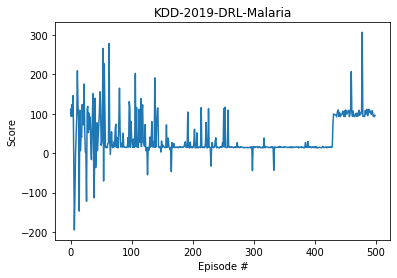

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("KDD-2019-DRL-Malaria")
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()